In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-vs-real-job-postings-synthetic-nlp-dataset/fake_real_job_postings_3000x25.csv


In [2]:
df = pd.read_csv("/kaggle/input/fake-vs-real-job-postings-synthetic-nlp-dataset/fake_real_job_postings_3000x25.csv")

df

,job_id,job_title,job_description,requirements,benefits,company_name,company_profile,industry,employment_type,location,...,application_deadline,contact_email,company_website,has_logo,num_open_positions,job_function,telecommuting,fraud_reason,text_length,is_fake
0,1,Software Engineer,We are looking for responsibilities fast-paced...,Candidates should have dynamic team skills fas...,We offer required skills fast-paced skills req...,Company_543,Our company growth fast-paced responsibilities...,Marketing,Contract,"Toronto, Canada",...,2024-09-16,hr312@company.com,https://www.company.com,0,3,Management,0,NaN,89,0
1,2,Content Writer,We are looking for required support experience...,Candidates should have required team fast-pace...,We offer fast-paced dynamic dynamic strategy g...,Company_192,Our company fast-paced opportunity innovation ...,Finance,Full-time,"Toronto, Canada",...,2024-10-18,hr127@company.com,https://www.company.com,0,10,Development,1,NaN,89,0
2,3,Customer Support Specialist,We are looking for dynamic required fast-paced...,Candidates should have preferred knowledge opp...,We offer skills experience required growth res...,NaN,We are global innovation growth skills knowled...,Healthcare,Internship,Remote,...,2024-01-13,job92@gmail.com,NaN,0,6,Support,0,Suspicious email,69,1
3,4,Data Analyst,We are looking for collaboration skills suppor...,Candidates should have innovation team require...,We offer strategy strategy dynamic support opp...,Company_95,Our company fast-paced support team strategy i...,Healthcare,Part-time,"Berlin, Germany",...,2024-02-09,hr366@company.com,https://www.company.com,1,4,Management,1,NaN,89,0
4,5,Graphic Designer,We are looking for team growth growth fast-pac...,Candidates should have experience preferred kn...,We offer opportunity skills responsibilities c...,NaN,We are global experience skills preferred fast...,Retail,Part-time,"London, UK",...,2024-08-26,job359@gmail.com,NaN,0,5,Management,0,No salary info,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,HR Coordinator,We are looking for required team responsibilit...,Candidates should have development fast-paced ...,We offer support strategy knowledge growth str...,Company_159,Our company growth required innovation collabo...,Finance,Temporary,"Berlin, Germany",...,2024-10-15,hr240@company.com,https://www.company.com,0,8,Analysis,1,NaN,89,0
2996,2997,Content Writer,We are looking for opportunity innovation requ...,Candidates should have preferred skills collab...,We offer experience team dynamic opportunity e...,NaN,We are global experience knowledge knowledge d...,Marketing,Full-time,"London, UK",...,2024-02-21,job171@gmail.com,NaN,0,7,Development,0,Suspicious email,69,1
2997,2998,Product Manager,We are looking for responsibilities growth dyn...,Candidates should have experience strategy kno...,We offer support team collaboration growth sup...,NaN,We are global dynamic innovation strategy grow...,IT,Contract,"London, UK",...,2024-02-13,job419@gmail.com,NaN,0,1,Development,1,No salary info,69,1
2998,2999,Business Analyst,We are looking for required dynamic support dy...,Candidates should have collaboration developme...,We offer preferred fast-paced development deve...,NaN,We are global required growth opportunity dyna...,Healthcare,Contract,"Toronto, Canada",...,2024-11-25,job274@gmail.com,NaN,0,5,Development,1,Unverified company,69,1


## **Data Exploration**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   job_id                     3000 non-null   int64 
 1   job_title                  3000 non-null   object
 2   job_description            3000 non-null   object
 3   requirements               3000 non-null   object
 4   benefits                   3000 non-null   object
 5   company_name               1528 non-null   object
 6   company_profile            3000 non-null   object
 7   industry                   3000 non-null   object
 8   employment_type            3000 non-null   object
 9   location                   3000 non-null   object
 10  salary_range               3000 non-null   object
 11  required_experience_years  3000 non-null   int64 
 12  education_level            3000 non-null   object
 13  department                 3000 non-null   object
 14  posting_

In [4]:
df.shape

(3000, 25)

In [5]:
df.columns.tolist()

['job_id',
 'job_title',
 'job_description',
 'requirements',
 'benefits',
 'company_name',
 'company_profile',
 'industry',
 'employment_type',
 'location',
 'salary_range',
 'required_experience_years',
 'education_level',
 'department',
 'posting_date',
 'application_deadline',
 'contact_email',
 'company_website',
 'has_logo',
 'num_open_positions',
 'job_function',
 'telecommuting',
 'fraud_reason',
 'text_length',
 'is_fake']

In [6]:
df.isnull().sum()

job_id                          0
job_title                       0
job_description                 0
requirements                    0
benefits                        0
company_name                 1472
company_profile                 0
industry                        0
employment_type                 0
location                        0
salary_range                    0
required_experience_years       0
education_level                 0
department                      0
posting_date                    0
application_deadline            0
contact_email                   0
company_website              1472
has_logo                        0
num_open_positions              0
job_function                    0
telecommuting                   0
fraud_reason                 1528
text_length                     0
is_fake                         0
dtype: int64

In [7]:
df['job_title'].value_counts()

job_title
Product Manager                319
Content Writer                 309
Software Engineer              307
Business Analyst               303
HR Coordinator                 301
Marketing Manager              300
Graphic Designer               298
Sales Executive                296
Customer Support Specialist    289
Data Analyst                   278
Name: count, dtype: int64

In [8]:
df['company_name'].value_counts()

company_name
Company_1133    6
Company_327     6
Company_915     6
Company_1123    5
Company_218     5
               ..
Company_258     1
Company_343     1
Company_1001    1
Company_1086    1
Company_723     1
Name: count, Length: 880, dtype: int64

In [9]:
df['industry'].value_counts().nlargest(10)

industry
Education     530
Healthcare    527
Marketing     519
Finance       483
IT            475
Retail        466
Name: count, dtype: int64

## **DATA CLEANING**

In [10]:

df['has_logo'] = df['has_logo'].astype('bool')
df['telecommuting'] = df['telecommuting'].astype('bool')
df['is_fake'] = df['is_fake'].astype('str')


In [11]:
df['is_fake'] = df['is_fake'].replace('0', 'No')

df['is_fake'] = df['is_fake'].replace('1', 'Yes')


In [12]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   job_id                     3000 non-null   int64         
 1   job_title                  3000 non-null   object        
 2   job_description            3000 non-null   object        
 3   requirements               3000 non-null   object        
 4   benefits                   3000 non-null   object        
 5   company_name               1528 non-null   object        
 6   company_profile            3000 non-null   object        
 7   industry                   3000 non-null   object        
 8   employment_type            3000 non-null   object        
 9   location                   3000 non-null   object        
 10  salary_range               3000 non-null   object        
 11  required_experience_years  3000 non-null   int64         
 12  educat

In [14]:
df.head()

,job_id,job_title,job_description,requirements,benefits,company_name,company_profile,industry,employment_type,location,...,application_deadline,contact_email,company_website,has_logo,num_open_positions,job_function,telecommuting,fraud_reason,text_length,is_fake
0,1,Software Engineer,We are looking for responsibilities fast-paced...,Candidates should have dynamic team skills fas...,We offer required skills fast-paced skills req...,Company_543,Our company growth fast-paced responsibilities...,Marketing,Contract,"Toronto, Canada",...,2024-09-16,hr312@company.com,https://www.company.com,False,3,Management,False,NaN,89,No
1,2,Content Writer,We are looking for required support experience...,Candidates should have required team fast-pace...,We offer fast-paced dynamic dynamic strategy g...,Company_192,Our company fast-paced opportunity innovation ...,Finance,Full-time,"Toronto, Canada",...,2024-10-18,hr127@company.com,https://www.company.com,False,10,Development,True,NaN,89,No
2,3,Customer Support Specialist,We are looking for dynamic required fast-paced...,Candidates should have preferred knowledge opp...,We offer skills experience required growth res...,NaN,We are global innovation growth skills knowled...,Healthcare,Internship,Remote,...,2024-01-13,job92@gmail.com,NaN,False,6,Support,False,Suspicious email,69,Yes
3,4,Data Analyst,We are looking for collaboration skills suppor...,Candidates should have innovation team require...,We offer strategy strategy dynamic support opp...,Company_95,Our company fast-paced support team strategy i...,Healthcare,Part-time,"Berlin, Germany",...,2024-02-09,hr366@company.com,https://www.company.com,True,4,Management,True,NaN,89,No
4,5,Graphic Designer,We are looking for team growth growth fast-pac...,Candidates should have experience preferred kn...,We offer opportunity skills responsibilities c...,NaN,We are global experience skills preferred fast...,Retail,Part-time,"London, UK",...,2024-08-26,job359@gmail.com,NaN,False,5,Management,False,No salary info,69,Yes


## **EXPLORATORY DATA ANALYSIS**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

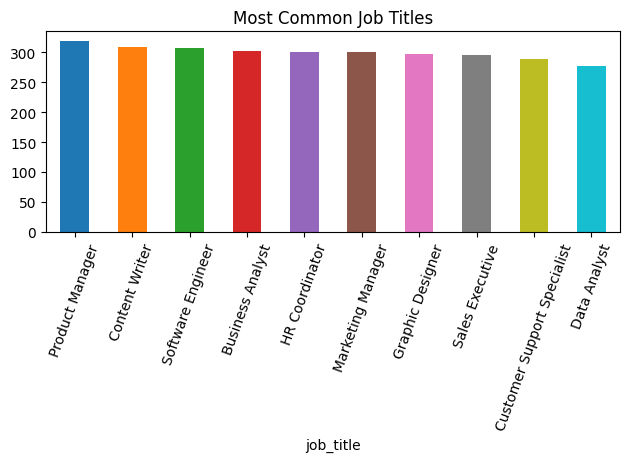

In [16]:
df['job_title'].value_counts().plot(kind='bar', color=plt.cm.tab10.colors)

plt.title("Most Common Job Titles")
plt.tight_layout()
plt.xticks(rotation=70)
plt.show()

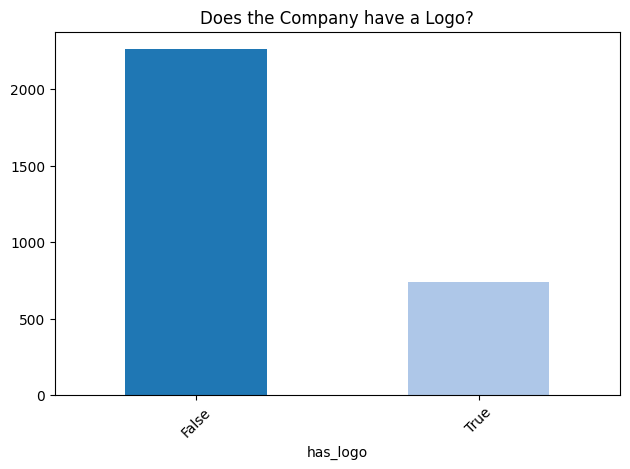

In [17]:
df['has_logo'].value_counts().plot(kind='bar', color=plt.cm.tab20.colors)

plt.title("Does the Company have a Logo?")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

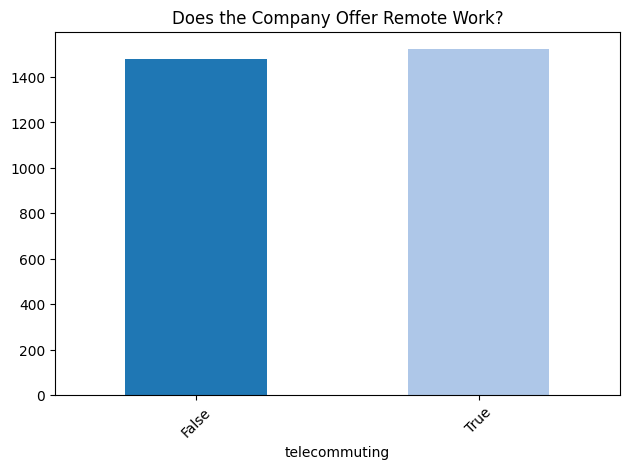

In [18]:
df['telecommuting'].value_counts().sort_index().plot(kind='bar', color=plt.cm.tab20.colors)

plt.title("Does the Company Offer Remote Work?")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

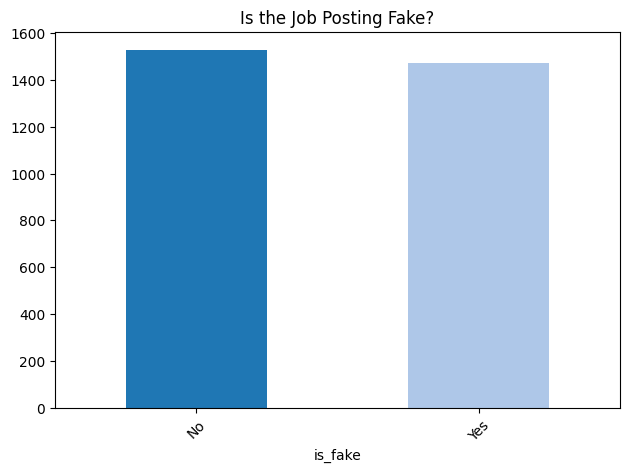

In [19]:
df['is_fake'].value_counts().plot(kind='bar', color=plt.cm.tab20.colors)

plt.title("Is the Job Posting Fake?")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

### **SEGMENTATION**

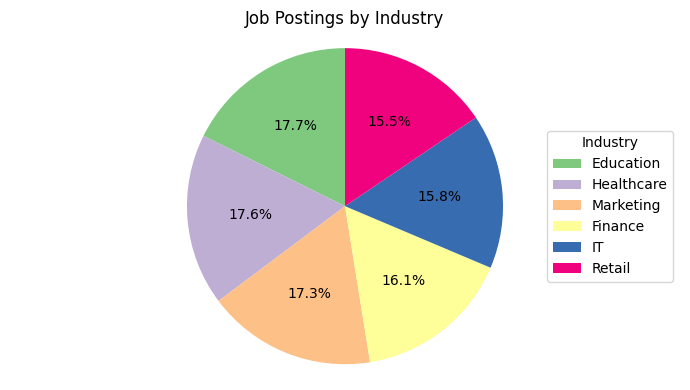

In [20]:
plt.figure(figsize=(7, 4))
industry_counts = df['industry'].value_counts()
plt.pie(
    industry_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Industry')
plt.axis('equal')
plt.legend(industry_counts.index,
          title="Industry",
          loc='center right')
plt.tight_layout()
plt.show()

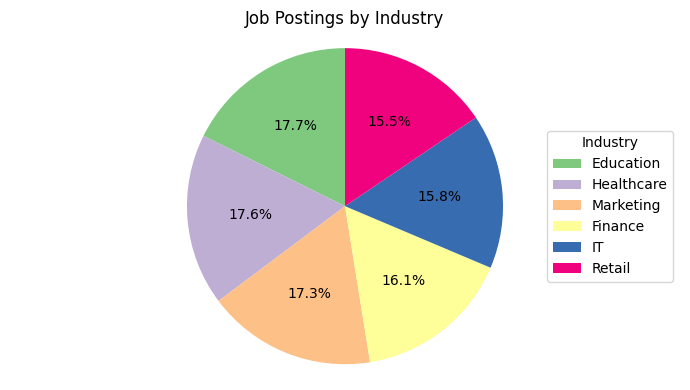

In [21]:
plt.figure(figsize=(7, 4))
industry_counts = df['industry'].value_counts()
plt.pie(
    industry_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Industry')
plt.axis('equal')
plt.legend(industry_counts.index,
          title="Industry",
          loc='center right')
plt.tight_layout()
plt.show()

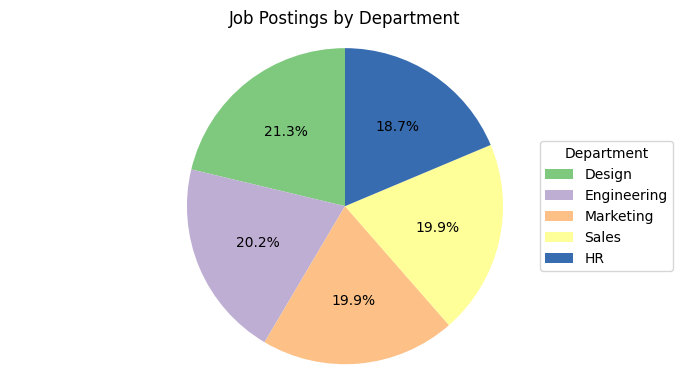

In [22]:
plt.figure(figsize=(7, 4))
department_counts = df['department'].value_counts()
plt.pie(
    department_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Department')
plt.axis('equal')
plt.legend(department_counts.index,
          title="Department",
          loc='center right')
plt.tight_layout()
plt.show()

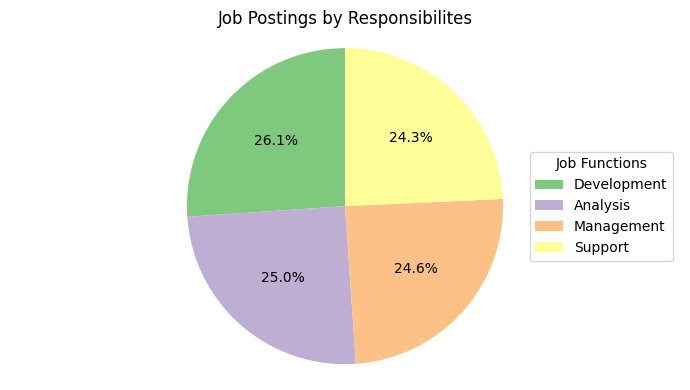

In [23]:
plt.figure(figsize=(7, 4))
roles_counts = df['job_function'].value_counts()
plt.pie(
    roles_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Responsibilites')
plt.axis('equal')
plt.legend(roles_counts.index,
          title="Job Functions",
          loc='center right')
plt.tight_layout()
plt.show()

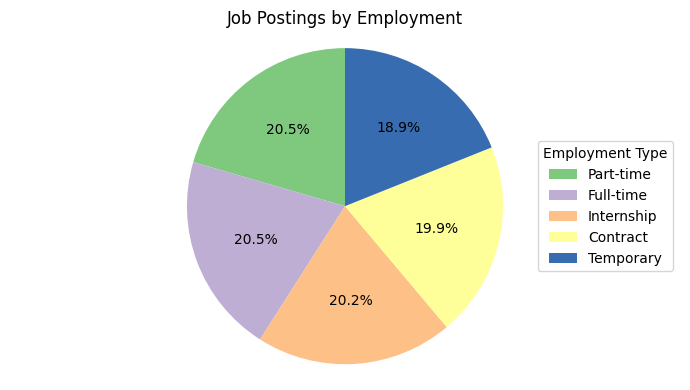

In [24]:
plt.figure(figsize=(7, 4))
employment_counts = df['employment_type'].value_counts()
plt.pie(
    employment_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Employment')
plt.axis('equal')
plt.legend(employment_counts.index,
          title="Employment Type",
          loc='center right')
plt.tight_layout()
plt.show()

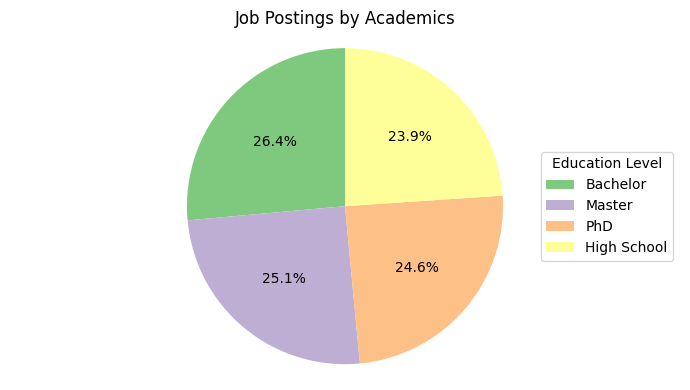

In [25]:
plt.figure(figsize=(7, 4))
education_counts = df['education_level'].value_counts()
plt.pie(
    education_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Academics')
plt.axis('equal')
plt.legend(education_counts.index,
          title="Education Level",
          loc='center right')
plt.tight_layout()
plt.show()

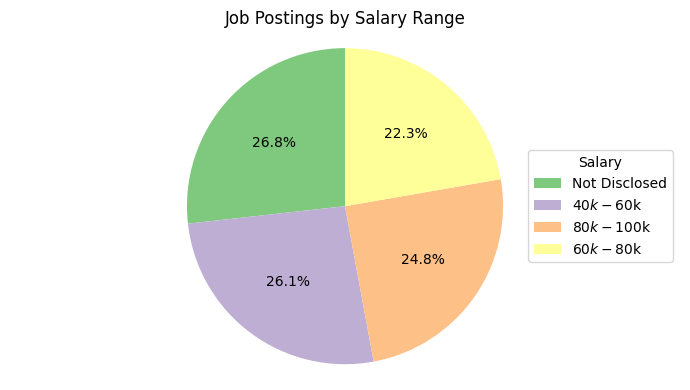

In [26]:
plt.figure(figsize=(7, 4))
salary_counts = df['salary_range'].value_counts()
plt.pie(
    salary_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Salary Range')
plt.axis('equal')
plt.legend(salary_counts.index,
          title="Salary",
          loc='center right')
plt.tight_layout()
plt.show()

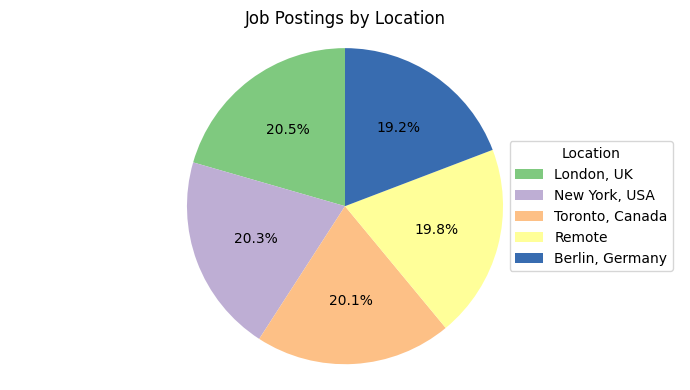

In [27]:
plt.figure(figsize=(7, 4))
location_counts = df['location'].value_counts()
plt.pie(
    location_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('Job Postings by Location')
plt.axis('equal')
plt.legend(location_counts.index,
          title="Location",
          loc='center right')
plt.tight_layout()
plt.show()

## **DISTRIBUTIONS**

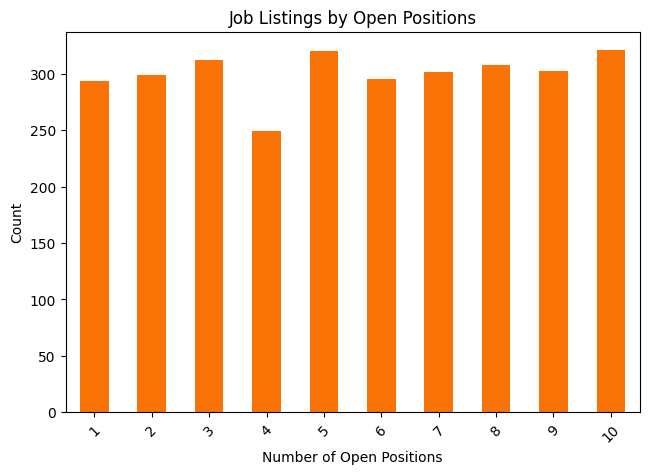

In [28]:
df['num_open_positions'].value_counts().sort_index().plot(kind='bar',color="#F97306")

plt.title("Job Listings by Open Positions")
plt.tight_layout()
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Number of Open Positions")
plt.show()

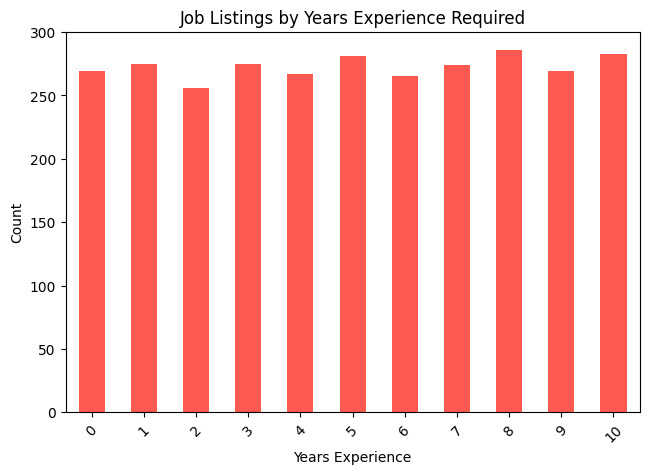

In [29]:
df['required_experience_years'].value_counts().sort_index().plot(kind='bar',color="#FC5A50")

plt.title("Job Listings by Years Experience Required")
plt.tight_layout()
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.xlabel("Years Experience")
plt.show()

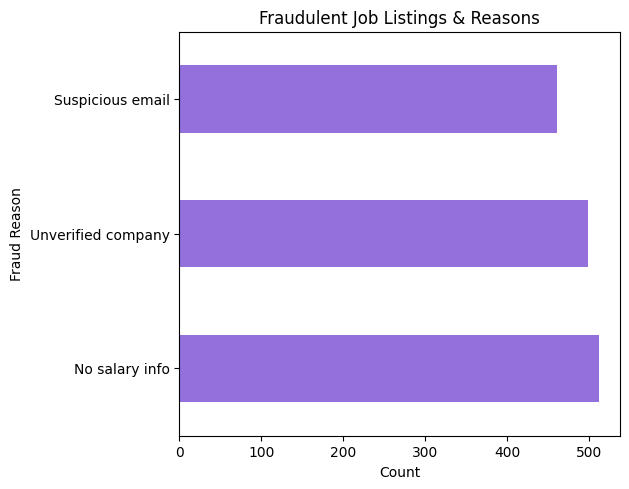

In [30]:
if 'fraud_reason' in df.columns:
    fraud_reason_df = df[df['is_fake']=='Yes']['fraud_reason'].value_counts()

fraud_reason_df.plot(kind='barh',color="mediumpurple")

plt.title("Fraudulent Job Listings & Reasons")
plt.tight_layout()
plt.ylabel("Fraud Reason")
plt.xlabel("Count")
plt.show()

In [31]:
df.columns

Index(['job_id', 'job_title', 'job_description', 'requirements', 'benefits',
       'company_name', 'company_profile', 'industry', 'employment_type',
       'location', 'salary_range', 'required_experience_years',
       'education_level', 'department', 'posting_date', 'application_deadline',
       'contact_email', 'company_website', 'has_logo', 'num_open_positions',
       'job_function', 'telecommuting', 'fraud_reason', 'text_length',
       'is_fake'],
      dtype='object')

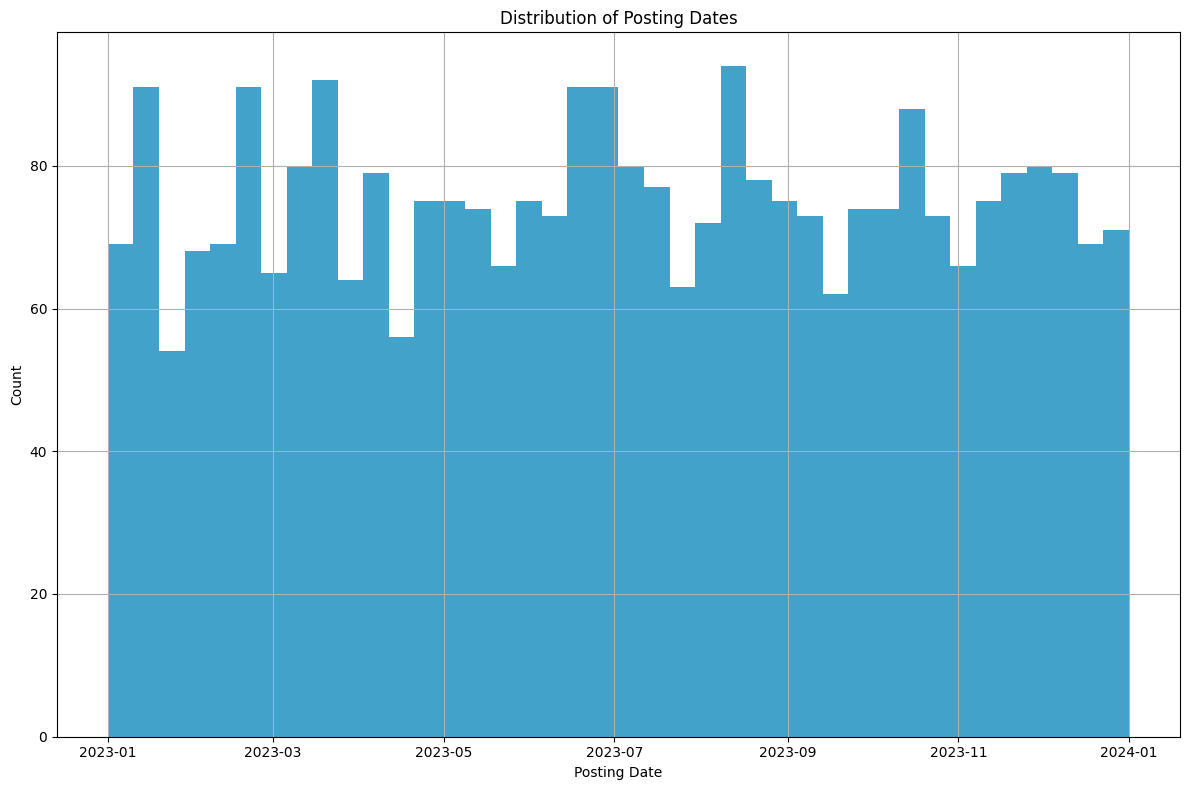

In [32]:
df['posting_date'].hist(bins=40, figsize=(12,8), color="#43a2ca")

plt.title("Distribution of Posting Dates")
plt.ylabel("Count")
plt.xlabel("Posting Date")
plt.tight_layout()
plt.show()

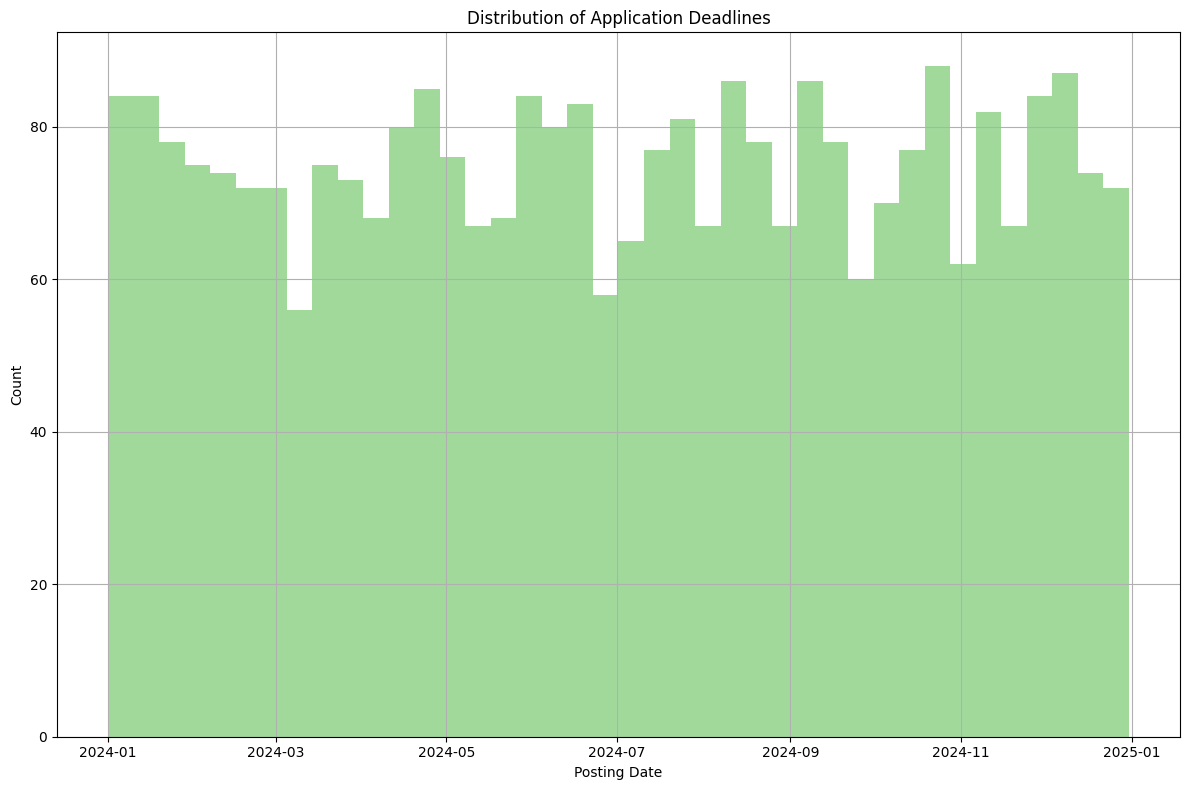

In [33]:
df['application_deadline'].hist(bins=40, figsize=(12,8), color="#a1d99b")

plt.title("Distribution of Application Deadlines")
plt.ylabel("Count")
plt.xlabel("Posting Date")
plt.tight_layout()
plt.show()

## **FRAUD DETECTION ANALYSIS**

### **CATEGORICAL VARIABLES**

In [34]:
if 'company_website' in df.columns:
    df['has_website'] = df['company_website'].notna().astype(int)

website_count = pd.crosstab(df['has_website'], df['is_fake'])

In [35]:
print("Website Presence vs Authenticity Summary")
print("=" * 50)

website_count

Website Presence vs Authenticity Summary


is_fake,No,Yes
has_website,,
0,0,1472
1,1528,0


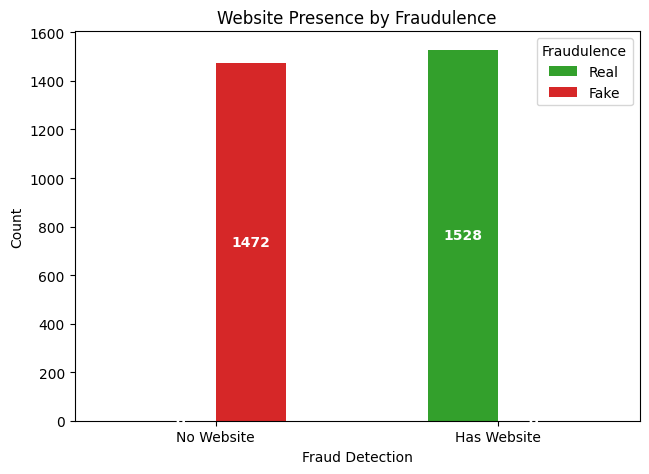

In [36]:
ax = website_count.plot(kind='bar', color=['#33a02c', '#d62728'])

plt.title("Website Presence by Fraudulence")
plt.tight_layout()
plt.ylabel("Count")
plt.xlabel("Fraud Detection")
plt.xticks(ticks=[0, 1], labels = ['No Website', 'Has Website'], rotation=0)
plt.legend(['Real', 'Fake'], title = 'Fraudulence')

# Add data labels on segments for better readability
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', weight='bold')
    
plt.show()

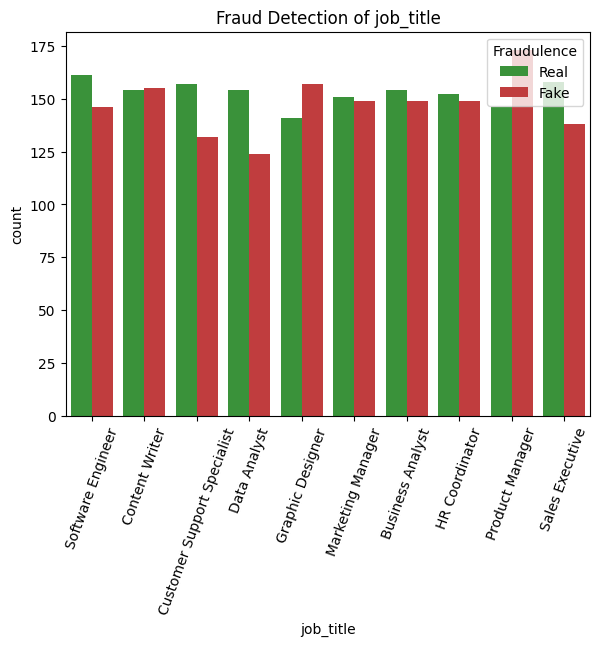

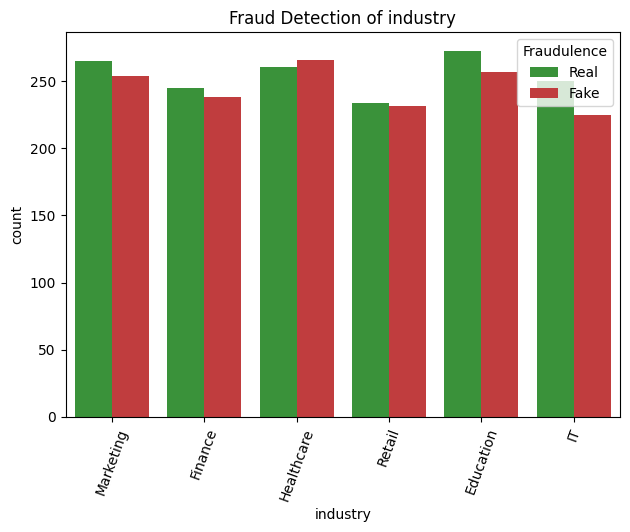

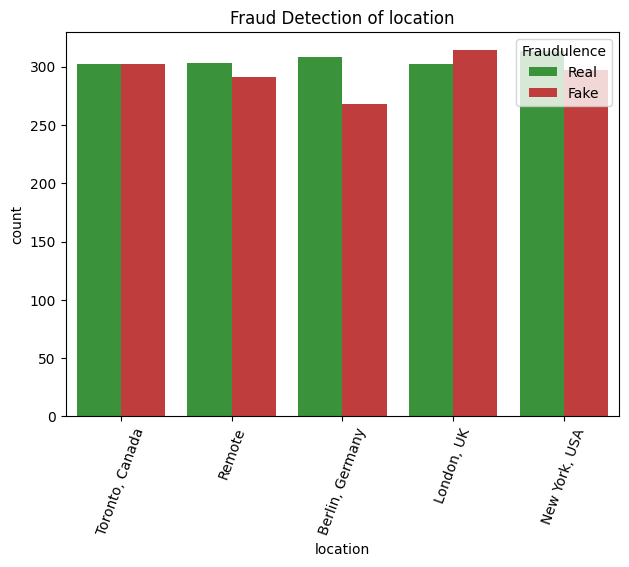

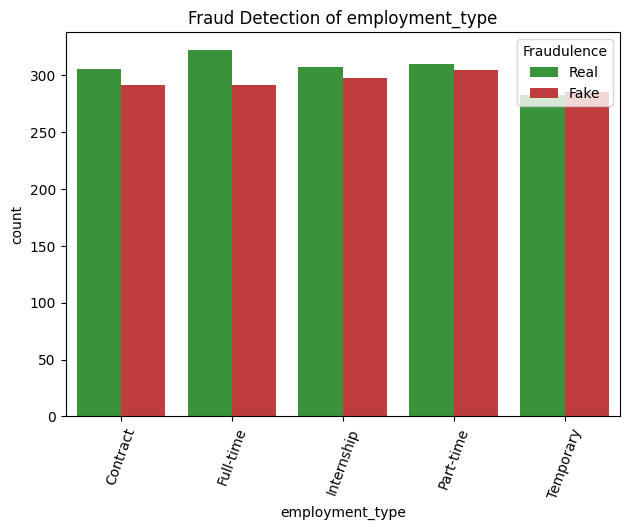

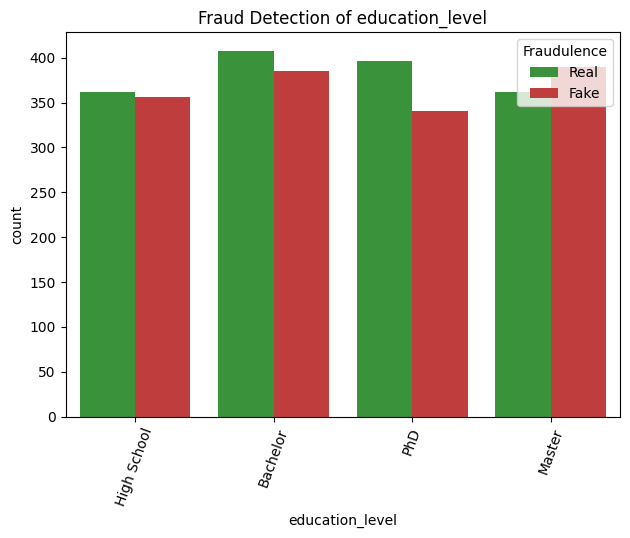

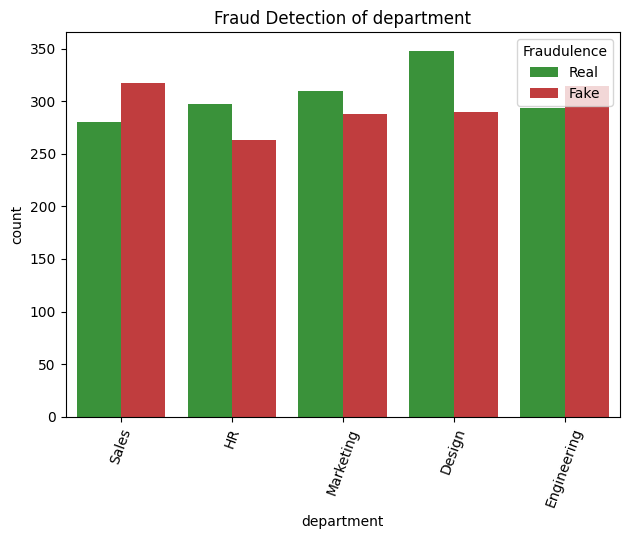

In [37]:
fraud_detection_categories = ['job_title', 'industry', 'location', 'employment_type', 'education_level', 'department']

for cols in fraud_detection_categories:
    if cols in df.columns:
        
        sns.countplot(x=df[cols], data=df, hue='is_fake', palette=["C12", "C3"])
        plt.title(f"Fraud Detection of {cols}")
        plt.tight_layout()
        plt.xticks(rotation=70)
        plt.legend(['Real', 'Fake'], title = 'Fraudulence')
        plt.show()

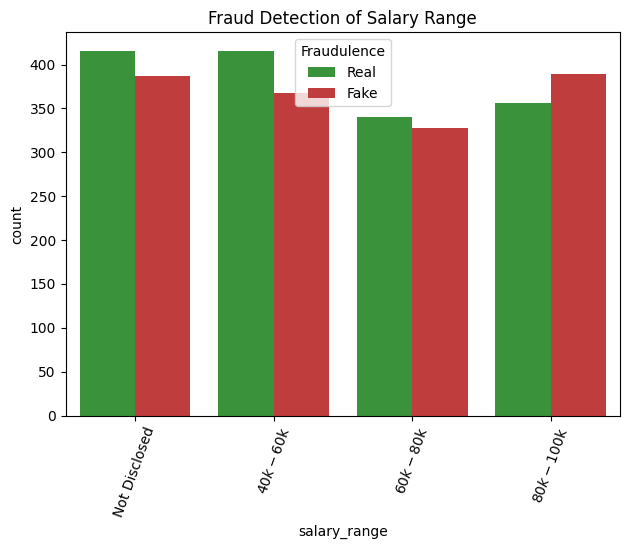

In [38]:

sns.countplot(x='salary_range', data=df, hue='is_fake', palette=["C12", "C3"], order=['Not Disclosed', '$40k-$60k', '$60k-$80k', '$80k-$100k']) # index gives categories in descending count order
plt.title("Fraud Detection of Salary Range")
plt.tight_layout()
plt.xticks(rotation=70)
plt.legend(['Real', 'Fake'], title = 'Fraudulence')
plt.show()


### **NUMERICAL VARIABLES**

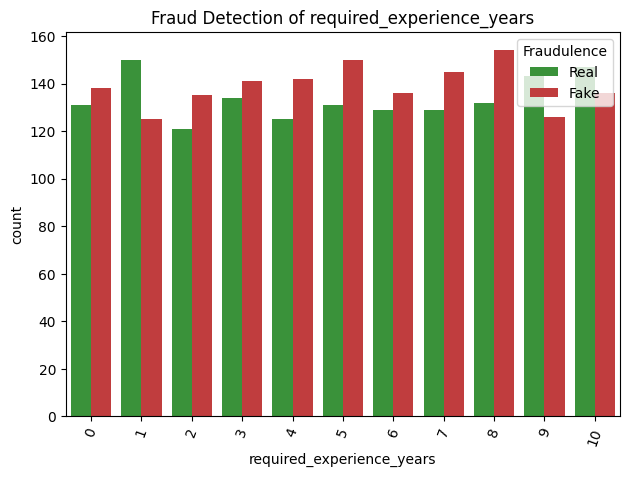

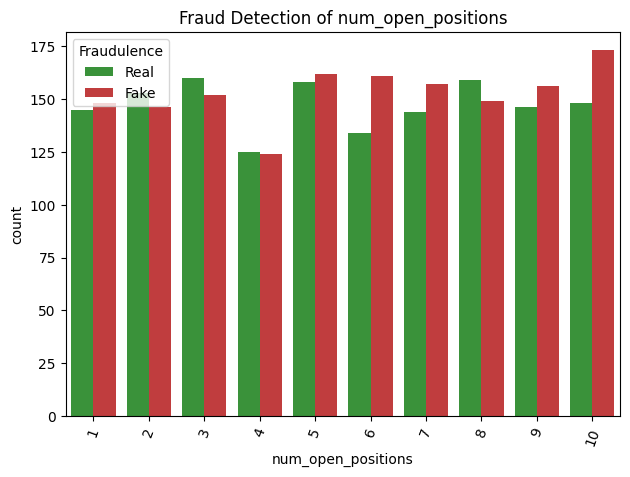

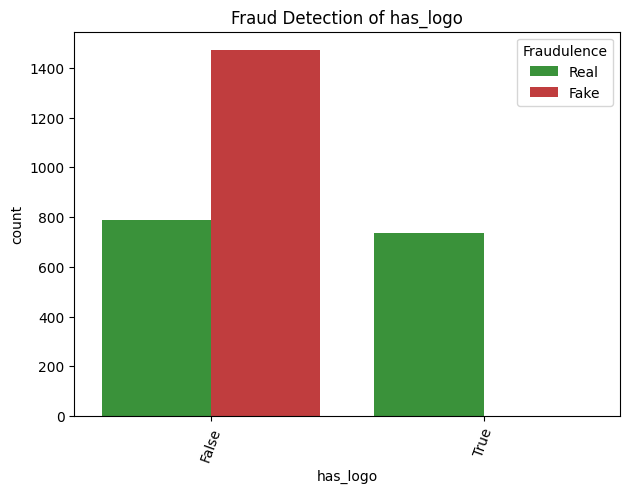

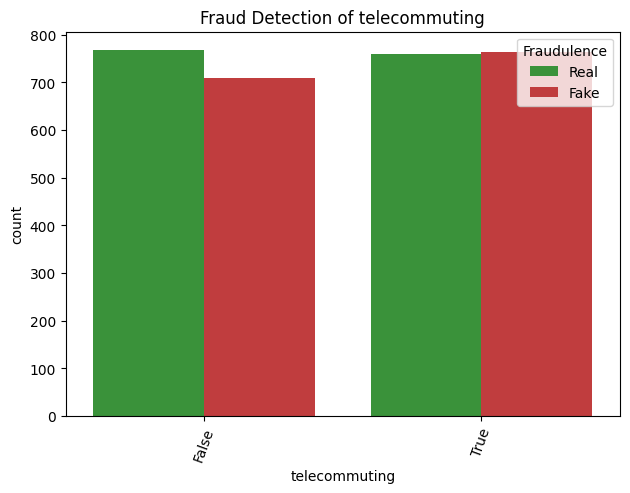

In [39]:
fraud_detection_numericals = ['required_experience_years', 'num_open_positions', 'has_logo', 'telecommuting']

for cols in fraud_detection_numericals:
    if cols in df.columns:
        
        sns.countplot(x=df[cols], data=df, hue='is_fake', palette=["C12", "C3"])
        plt.title(f"Fraud Detection of {cols}")
        plt.tight_layout()
        plt.xticks(rotation=70)
        plt.legend(['Real', 'Fake'], title = 'Fraudulence')
        plt.show()

### **TEXTUAL ANALYSIS**

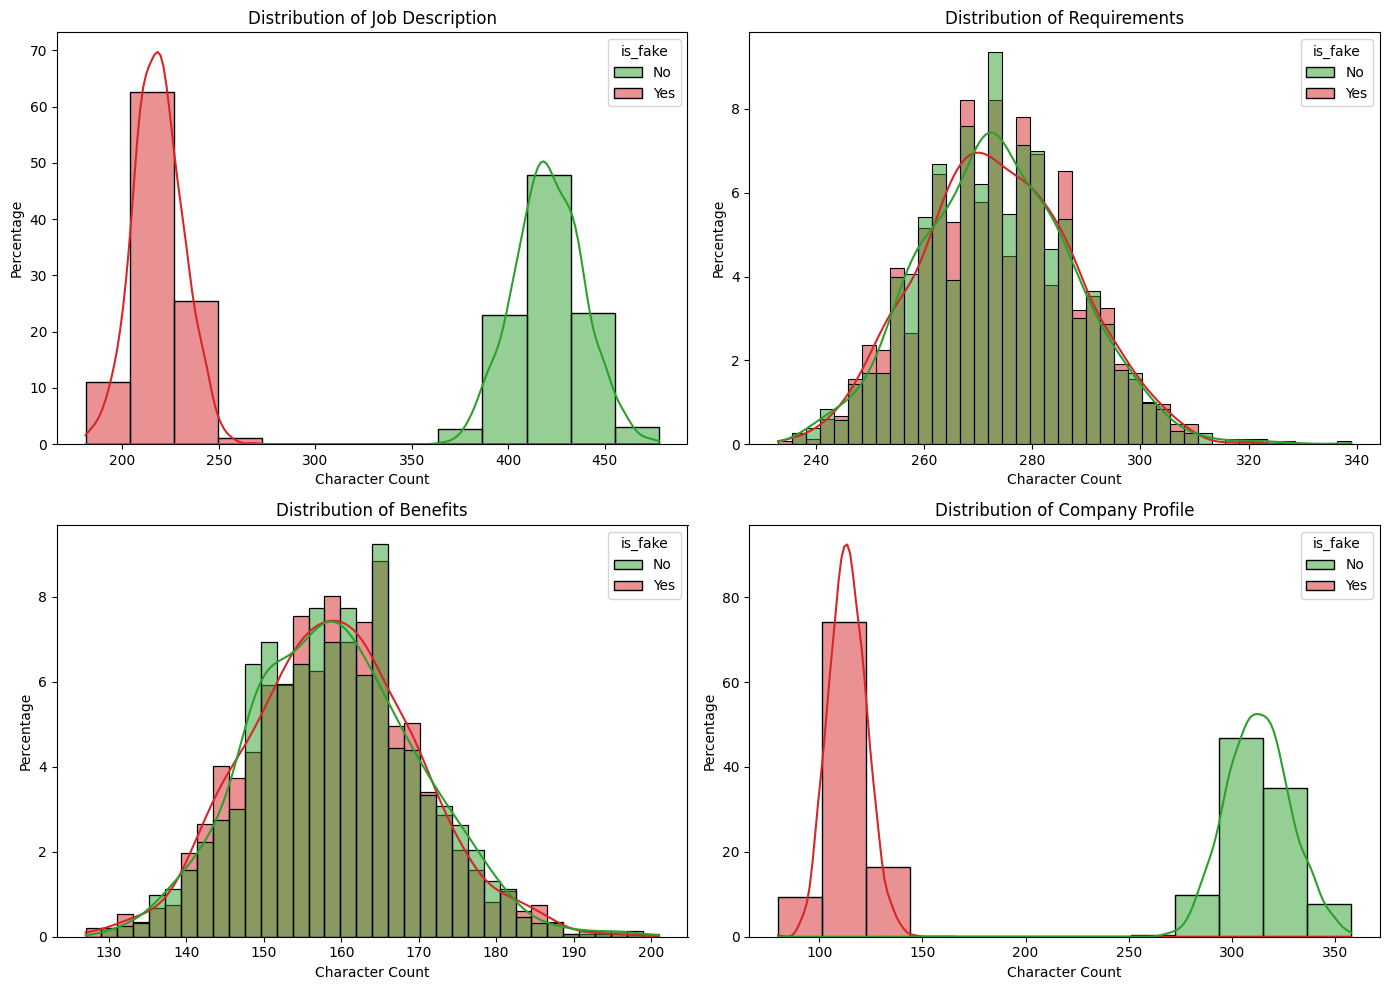

In [40]:
text_columns = ['job_description', 'requirements', 'benefits', 'company_profile']

# Create subplots grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(text_columns):
    # Calculate character count (handling potential nulls)
    char_counts = df[col].str.len().fillna(0)
    
    # Plot histogram with hue for 'is_fake'
    sns.histplot(
        data=df, 
        x=char_counts, 
        hue='is_fake', 
        stat="percent",      # Set y-axis to Density
        common_norm=False,   # Normalizes each 'is_fake' group independently
        kde=True,            # Optional: add trend line
        ax=axes[i],
        palette=["C12", "C3"]
    )
    
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel("Character Count")
    axes[i].set_ylabel("Percentage")

plt.tight_layout()
plt.show()


In [41]:
## Import wordcloud package library

from wordcloud import WordCloud, STOPWORDS

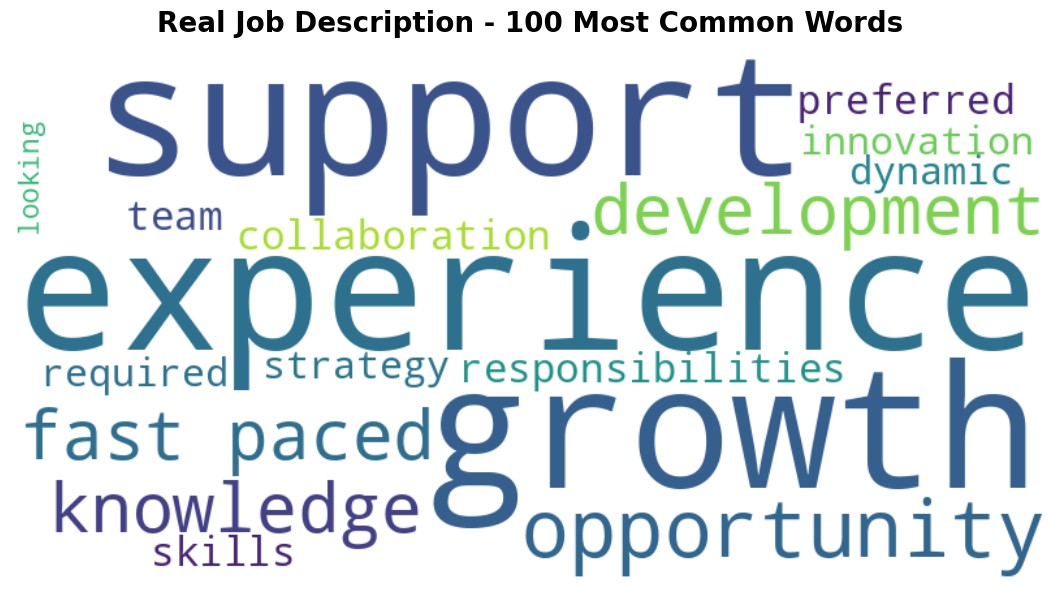

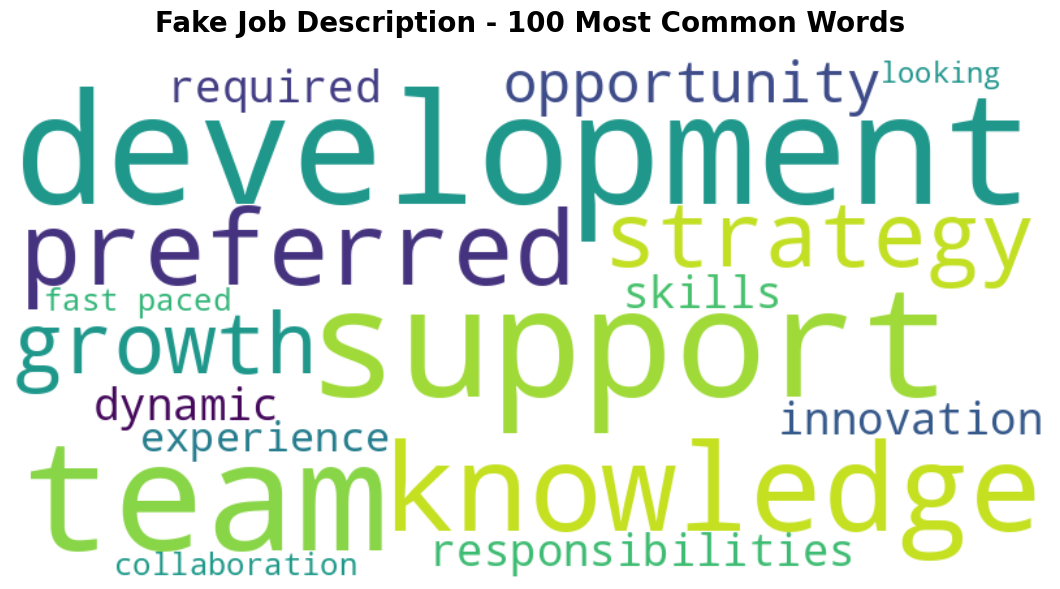

In [42]:
# Create word cloud visualization for real vs fake job descriptions
def create_wordcloud(text_data, title):
    """Create word cloud from text data"""
    # Combine all text
    combined_text = ' '.join(text_data.fillna('').astype(str).tolist())

    word_cloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate(combined_text)

    plt.figure(figsize=(14, 6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

if 'job_description' in df.columns:

    real_job_desc = df[df['is_fake'] == 'No']['job_description']
    fake_job_desc = df[df['is_fake'] == 'Yes']['job_description']

    create_wordcloud(real_job_desc, "Real Job Description - 100 Most Common Words")
    create_wordcloud(fake_job_desc, "Fake Job Description - 100 Most Common Words")

## **INSIGHTS**

In [43]:

print("DATASET SUMMARY")
print("=" * 50)

print(f"Total Records: {df.shape[0]} records.")
print(f"Total Columns: {df.shape[1]} columns.")
print(f"Total Non-Null Values: {df.notnull().sum().sum()} values.")
print(f"Total Null Values: {df.isnull().sum().sum()} values.")

print("=" * 50)
print("STATISTICS BREAKDOWN")
df.describe().round(2)


DATASET SUMMARY
Total Records: 3000 records.
Total Columns: 26 columns.
Total Non-Null Values: 73528 values.
Total Null Values: 4472 values.
STATISTICS BREAKDOWN


,job_id,required_experience_years,posting_date,application_deadline,num_open_positions,text_length,has_website
count,3000.00,3000.00,3000,3000,3000.00,3000.00,3000.00
mean,1500.50,5.04,2023-07-03 05:22:33.599999744,2024-07-01 17:33:36,5.56,79.19,0.51
min,1.00,0.00,2023-01-01 00:00:00,2024-01-01 00:00:00,1.00,69.00,0.00
25%,750.75,2.00,2023-04-03 00:00:00,2024-04-03 00:00:00,3.00,69.00,0.00
50%,1500.50,5.00,2023-07-03 00:00:00,2024-07-02 00:00:00,6.00,89.00,1.00
75%,2250.25,8.00,2023-10-02 00:00:00,2024-10-02 00:00:00,8.00,89.00,1.00
max,3000.00,10.00,2024-01-01 00:00:00,2024-12-31 00:00:00,10.00,89.00,1.00
std,866.17,3.17,NaN,NaN,2.89,10.00,0.50


In [44]:
print("AUTHENTICITY SUMMARY")
print("=" * 50)

fraud_dist = df['is_fake'].value_counts().sort_index()
fraud_pct = df['is_fake'].value_counts(normalize=True).sort_index() * 100

print(f"Total Real Postings: {fraud_dist[0]} records.")
print(f"Total Fake Postings: {fraud_dist[1]} columns.")
print(f"Real %: {fraud_pct[0]:.2f}")
print(f"Fake %: {fraud_pct[1]:.2f}")
print("=" * 50)
print(f"Dataset Balance: {abs(fraud_pct[0] - fraud_pct[1])}")
print(f"Dataset is {'balanced' if abs(fraud_pct[0] - fraud_pct[1]) < 5 else 'imbalanced'}")

print("=" * 50)


AUTHENTICITY SUMMARY
Total Real Postings: 1528 records.
Total Fake Postings: 1472 columns.
Real %: 50.93
Fake %: 49.07
Dataset Balance: 1.8666666666666671
Dataset is balanced


In [45]:
if 'fraud_reason' in df.columns:
    # Appending [0] is to extract the single value from that resulting Series so you can use it directly as a string or number.
    top_reason = df[df['is_fake'] == "Yes"]['fraud_reason'].mode()[0]


In [46]:
if 'company_website' in df.columns:
    # 1. Percentage of companies WITHOUT a website that are fake
    no_website_mask = df['company_website'].isnull()
    total_no_website = df[no_website_mask].shape[0]
    
    if total_no_website > 0:
        fraud_no_website = (df[no_website_mask & (df['is_fake'] == "Yes")].shape[0] / total_no_website) * 100
    else:
        fraud_no_website = 0

    # 2. Percentage of companies WITH a website that are fake
    with_website_mask = df['company_website'].notnull()
    total_with_website = df[with_website_mask].shape[0]
    
    if total_with_website > 0:
        fraud_with_website = (df[with_website_mask & (df['is_fake'] == "Yes")].shape[0] / total_with_website) * 100
    else:
        fraud_with_website = 0



In [47]:
print("KEY FRAUD INDICATORS")
print("=" * 50)
print(f"Most Common Reason: {top_reason}")
print(f"Fraud Activity without Website: {fraud_no_website:.2f}%")
print(f"Fraud Activity with Website: {fraud_with_website:.2f}%")

KEY FRAUD INDICATORS
Most Common Reason: No salary info
Fraud Activity without Website: 100.00%
Fraud Activity with Website: 0.00%


### **CORRELATIONS**

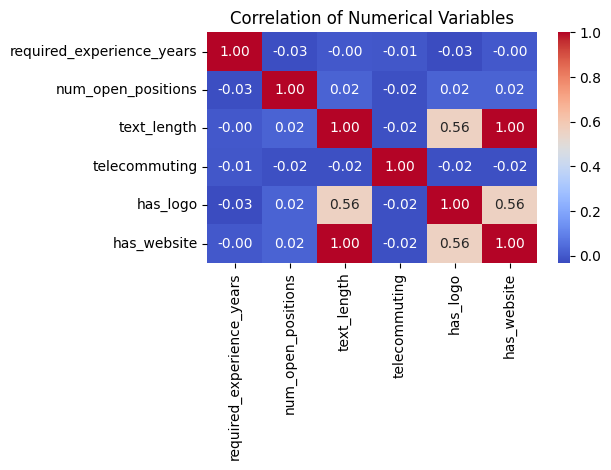

In [48]:
# Correlation matrix for numerical variables
numerical_cols = ['required_experience_years', 'num_open_positions', 'text_length', 'telecommuting', 'has_logo', 'has_website']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.title("Correlation of Numerical Variables")
plt.tight_layout()
plt.show()